# Course 3 Final Assignment: Predicting Future Outcomes

# 1. Make Predictions with Regression

In [127]:
# Import the necessary libraries
# First the libraries for creating linear regression
import numpy as np
import pandas as pd 
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
# Now the libraries that visualise linear regression 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [128]:
# Improt the turtles reviews csv file 
reviews = pd.read_csv('turtle_reviews.csv')
# Print the data to view the collumns 
print(reviews)

      gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  produ

In [129]:
# Create a dataframe to store the reviews data 
rv = pd.DataFrame(reviews)
# Print the dataframe
rv

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [130]:
# Can print the shape of the DataFrame
rv.shape
# The below shows the DataFrame gas 2000 rows and 11 columns 

(2000, 11)

In [131]:
# Complete a sense check by printing the datatypes and metadata for the above dataframe
rv.dtypes # Printing the data types

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object

In [132]:
# Printing the Metadata
rv.info() # We can see there are 2000 non-null values in all 11 columns 
rv.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')

In [133]:
# Printing the final metadata for the DataFrame
rv.describe

<bound method NDFrame.describe of       gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     

In [134]:
# Checking for any missing values in the DataFrame  
# We can see from the above that there are no visible NaN values but we need to check all cells that are not visisble above 

# First we need to make new versions of the DataFrames to make sure we don't interfer with the inital ones 

rv_na = rv[rv.isna().any(axis=1)]
rv_na.shape

# The below shows there are 0 missing values in 11 columns 

(0, 11)

In [135]:
# Summary of the descriptive staistics 

In [136]:
# Now we will remove the columsn for 'language' and 'platform' as they are redundant
rv.drop('language', axis=1, inplace=True)

In [137]:
rv.drop('platform', axis=1, inplace=True) # Removing the 'platform' column

In [138]:
# Change column names for remuneration and spending score to make it easier to reference 
rv.rename(columns={'remuneration (k£)': 'remuneration', 'remuneration (k£)': 'remuneration'}, inplace=True)

In [139]:
# Changing the spending_score (1-100) column to spending_score so it is easier to reference 
rv.rename(columns={'spending_score (1-100)': 'spending_score', 'spending_score (1-100)': 'spending_score'}, inplace=True)

In [140]:
# Printing new and cleaned DataFrame to view 
rv

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [141]:
# Now we can export the cleaned dataframe into a csv file which is imported to sensecheck
rv.to_csv('reviews1.csv')

In [142]:
reviews1 = pd.read_csv('reviews1.csv')
rv1 = pd.DataFrame(reviews1)  # Now making a DataFrame from the new cvs file
rv1

,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...
1995,1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


# Now we will create a linear regression and create the OLS model 

In [143]:
# Import the required libraries to create the linear regression
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [144]:
# We will be using the rv1 DataFrame created above 
rv1.head() # View the head of the DataFrame 

,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


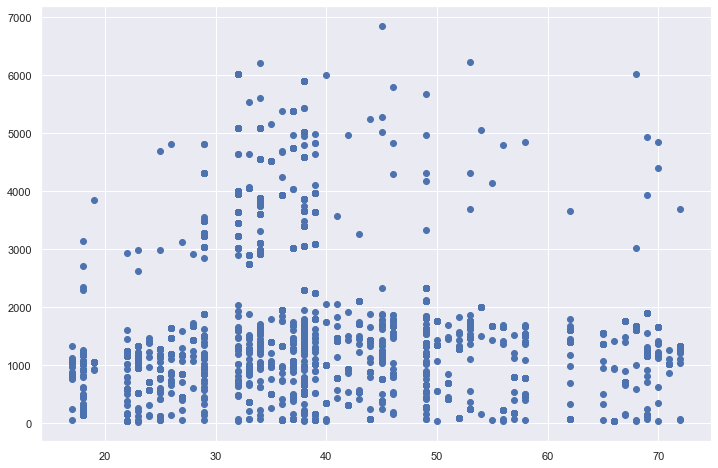

In [145]:
# Define the variables for the linear regression 

# Dependent Varaible
y = rv1["loyalty_points"] 

# Independent Variable 
X = rv1["age"]

# Check for linearity between the 2 variables
plt.scatter(X,y)

# Run an OLS Test 

# Loyalty_Points vs Age

In [146]:
# Run the OLS test.
f = 'y ~ X'
test = ols(f, data = rv1).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 01 May 2023   Prob (F-statistic):             0.0577
Time:                        20:02:42   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
# NOTES: 𝑅2
# 65% of the total variability of y (money spent by customers), is explained by the variability of X (how long they have been a member).
#F-stat: If the probability of F stat. is smaller than a threshold (usually 0.05), the set of variables of the regression model are significant, else, the regression is not good. For simple regression model, the t-statistic is equivalent.
#X: The coefficient of X describes the slope of the regression line, in other words, how much the response variable y change when X changes by 1 unit. In this activity, if the length that the customer has been a member (X) changes by 1 unit (please check units used) the money spent (y) will change by 64.2187 units.
#The t-value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. In this case, the probability of the t-value is zero, thus the estimated slope is significant.
#The last two numbers describe the 95% confidence interval of the true xcoefficient, i.e. the true slope. For instance, if you take a different sample, the estimated slope will be slightly different. If you take 100 random samples each of 500 observations of X and y, then 95 out of the 100 samples will derive a slope that is within the interval (60.112 , 68.326).
#In case of a multivariate regression model, each explanatory variable will have a separate row with the above information. So we will need to check which of the variables are significant, remove the ones that are not significant and then re-run the new regression model.

In [148]:
# Create a linear equation between loyalty_points and age 
# x coef: -4.0128
# Constant coef: 1736.5177
# Create the linear equation.
y_pred = 1736.5177 + -4.0128 * X

# View the output.
y_pred

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

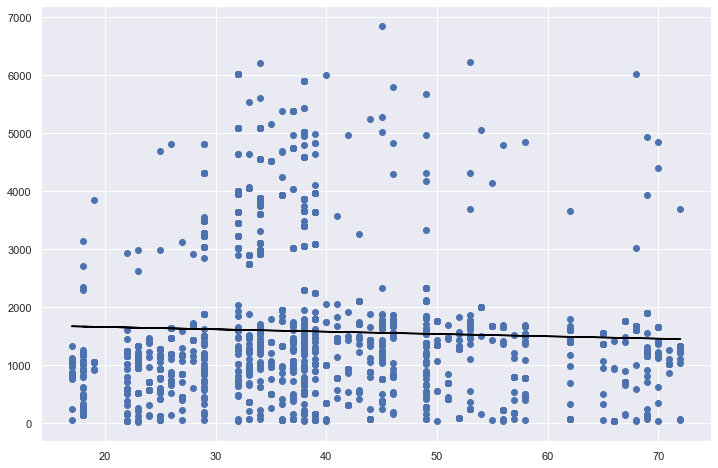

In [149]:
# Plot the data points.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='black')

# Loyalty_Points vs Remuneration

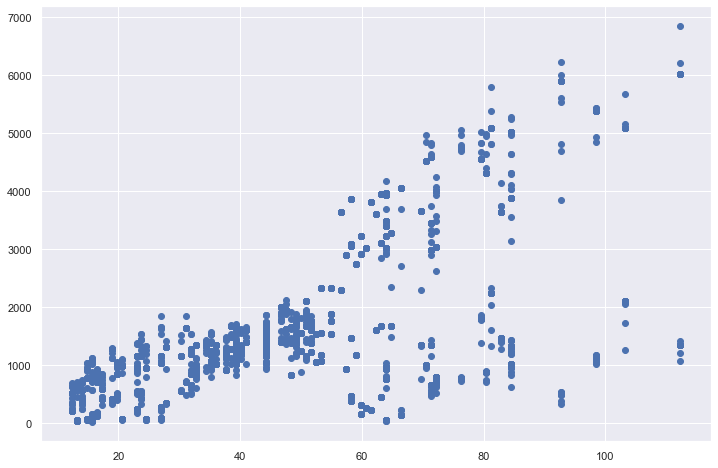

In [150]:
# Define the variables for the linear regression 

# Dependent Varaible
y = rv1["loyalty_points"] 

# Independent Variable 
X = rv1["remuneration"]

# Check for linearity between the 2 variables
plt.scatter(X,y)

In [151]:
# Run the OLS test.
f = 'y ~ X'
test = ols(f, data = rv1).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 01 May 2023   Prob (F-statistic):          2.43e-209
Time:                        20:02:43   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
# Create the Linear Regression Equation 
# x coef: 34.1878
# Constant coef: -65.6865
# Create the linear equation.
y_pred = -65.6865 + 34.1878 * X

# View the output.
y_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: remuneration, Length: 2000, dtype: float64

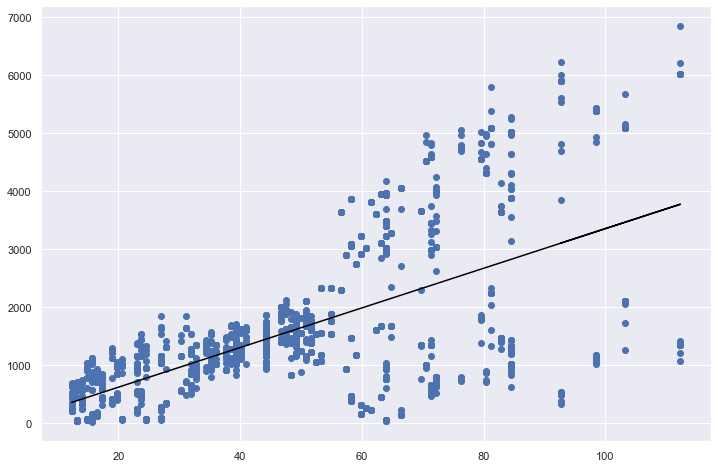

In [153]:
# Plot the regresssion
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='black')

# Loyalty_Points vs Spending Scores

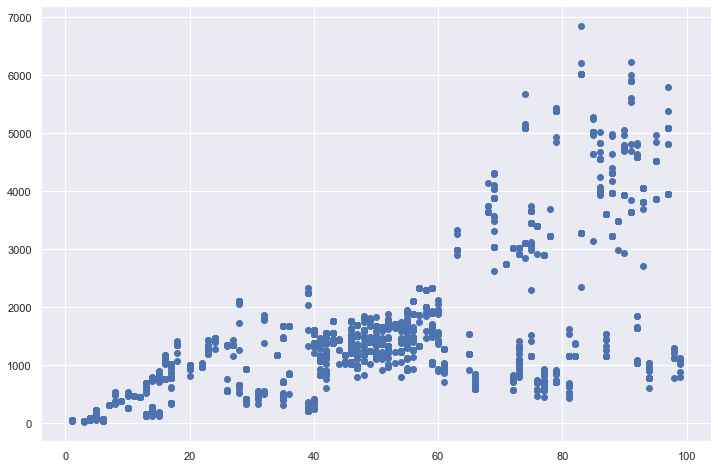

In [154]:
# Define the variables for the linear regression 

# Dependent Varaible
y = rv1["loyalty_points"] 

# Independent Variable 
X = rv1["spending_score"]

# Check for linearity between the 2 variables
plt.scatter(X,y)

In [155]:
# Run the OLS test.
f = 'y ~ X'
test = ols(f, data = rv1).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 01 May 2023   Prob (F-statistic):          2.92e-263
Time:                        20:02:44   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
# Create the Linear Regression Equation 
# x coef: 33.0617
# Constant coef: -75.0527
# Create the linear equation.
y_pred = -75.0527 + 33.0617 * X

# View the output.
y_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score, Length: 2000, dtype: float64

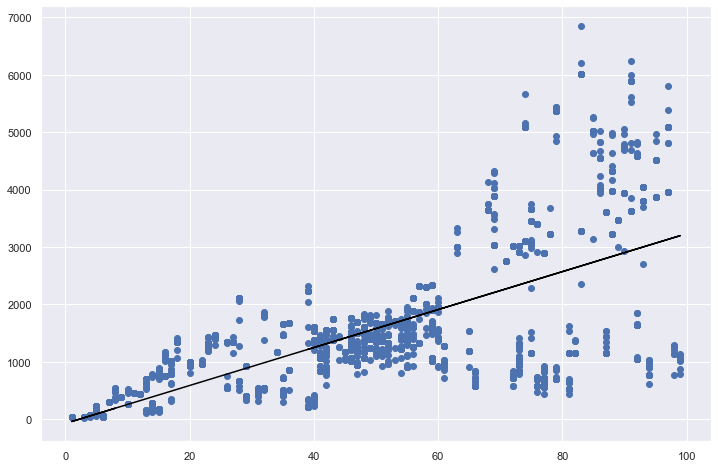

In [157]:
# Plot the regresssion
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='black')

# SUMMARY

In [ ]:
# There is no correlation between loyalty points and age
# There is a strong positive correlation between loyalty points and remuneration
# There is a strong positive correlation between loyalty points and spending score
# Customers can gain more loyalty points in the futrue through spending more at Turtle Gameshad a peak

# 2. Making Predictions with Clustering

In [158]:
# Import necessary libraries.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [159]:
# Need to import warnings
import warnings  
warnings.filterwarnings('ignore')

In [160]:
# Create new DataFrame from rv1 with remuneration and soending_score
rv2 = rv1[['remuneration','spending_score']].copy()
rv2

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [161]:
# Now explore the new DataFrame
rv2.isnull().sum() # The below shows there are no null values in the rv2

remuneration      0
spending_score    0
dtype: int64

In [162]:
# Determine descriptive statistics.
rv2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


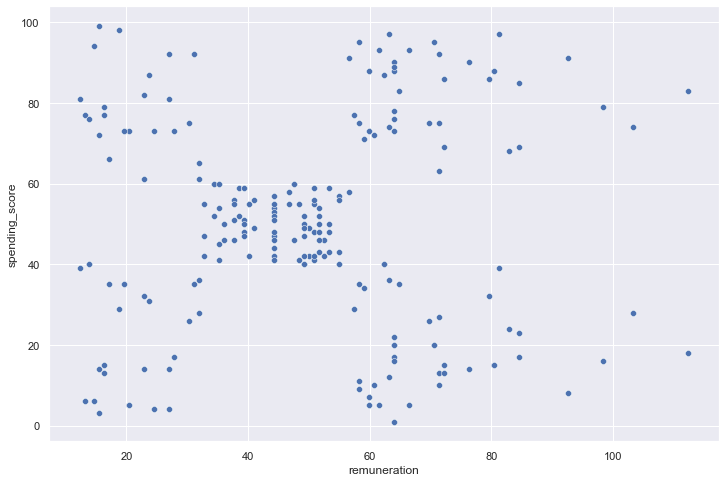

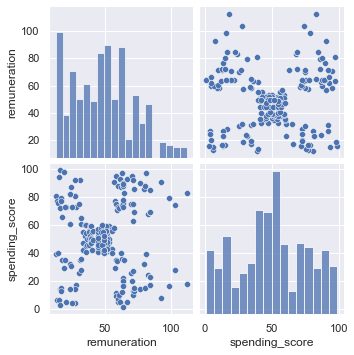

In [163]:
# Visualise the new DataFrame 

# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=rv2)


# Create a pairplot with Seaborn.
x = rv2[['remuneration', 'spending_score']]

sns.pairplot(rv2,
             vars=x,
             )

# Elbow Method

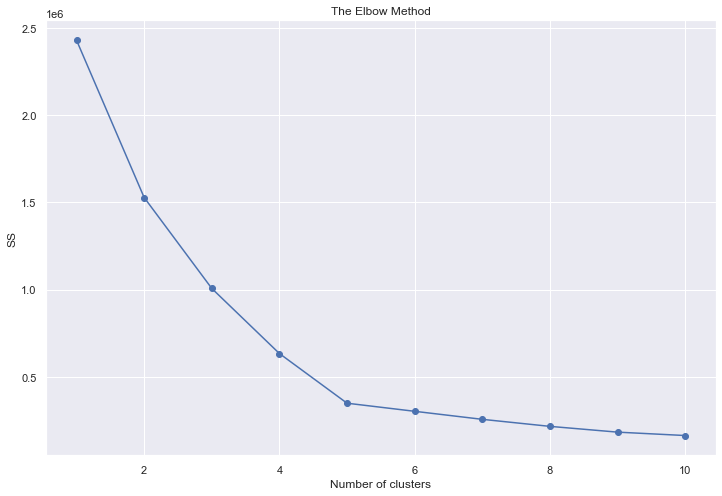

In [164]:
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

# From below, we can see 5 clusters is where the WSS begins to deminsih and hence indicates 5 clusters will be ideal for clustering. 

# Silhouette Method

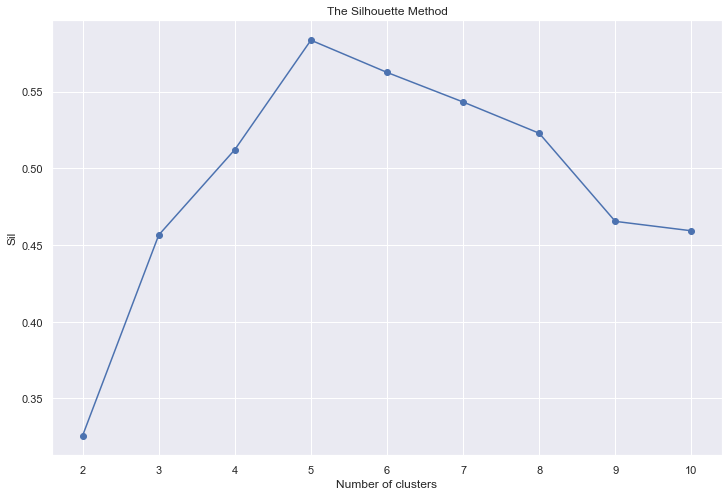

In [165]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

# From below we can see the Silhouette method peaks at 5 clusters, indicating 5 as the idea number of clusters. 

# We will use 5 clusters 

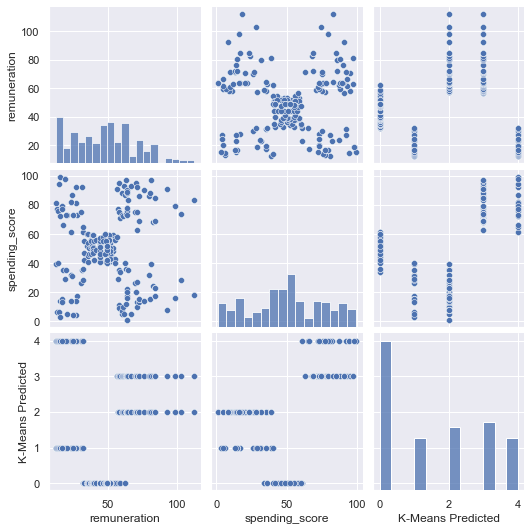

In [166]:
# Now we will fit the model 
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted
sns.pairplot(x,
             )

In [167]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [168]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

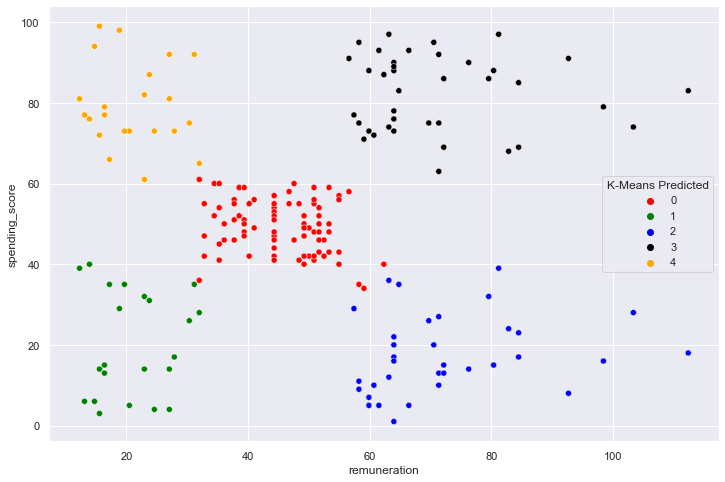

In [169]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

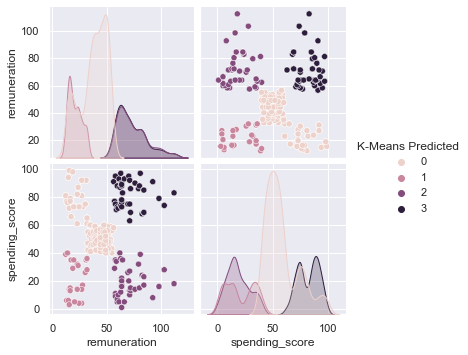

In [170]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             )

In [171]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

In [172]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  0
2         13.12               6                  1
3         13.12              77                  0
4         13.94              40                  1


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

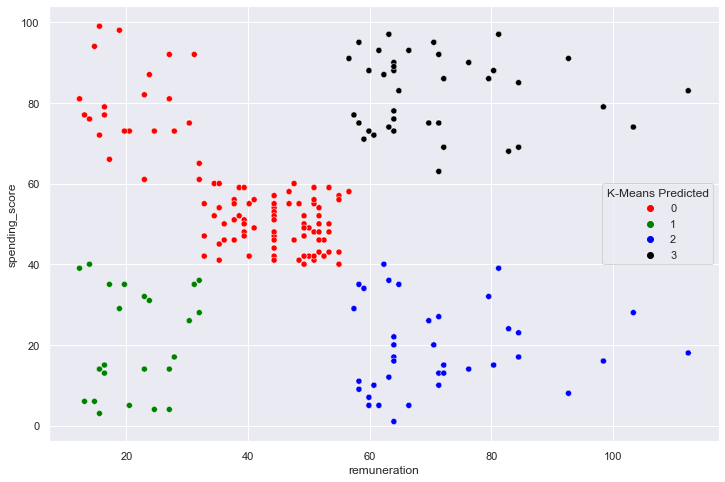

In [173]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])

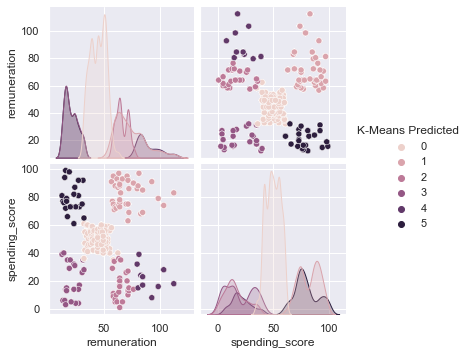

In [174]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             )

In [175]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

In [176]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  5
2         13.12               6                  3
3         13.12              77                  5
4         13.94              40                  3


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

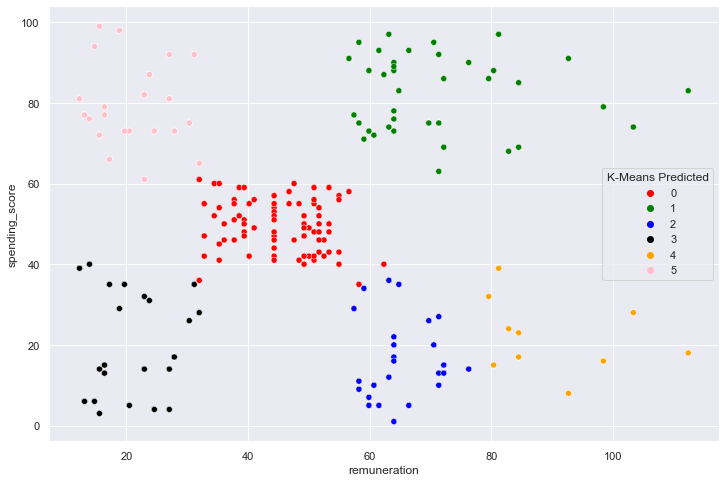

In [177]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange','pink'])

# Conclusion

In [178]:
# best to use 5 clusters as 4 is not distinct enough and 6 is too much. 

# 3. Analyse Customer Sentiment with Reviews 

In [179]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
# We will look at the 'review' and 'summary' columns
rv3 = rv1[['review','summary']].copy()
rv3

In [180]:
# Now explore the new DataFrame
rv3.isnull().sum() # The below shows there are no null values in the rv3

review     0
summary    0
dtype: int64

In [181]:
# Determine descriptive statistics.
rv3.describe()

,review,summary
count,2000,2000
unique,1980,1432
top,"[love, it]","[Five, Stars]"
freq,5,378


In [182]:
rv3.dtypes

review     object
summary    object
dtype: object

In [183]:
# Convert the data in both columns to lower case 
rv3['review'] = rv3['review'].str.lower()
rv3['summary'] = rv3['summary'].str.lower()
rv3 # print DataFrame to ensure it is now lowercase

,review,summary
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1995,NaN,NaN
1996,NaN,NaN
1997,NaN,NaN
1998,NaN,NaN


In [184]:
# Need to join elements in each column
#s = "-"
#rv4 = s.join(rv3)
#print(rv4)
import re

def punctuation_space(match_obj):
    """ return whatever matched surrounded by spaces """

    return ' ' + match_obj.group() + ' '

def fn(string):

    # first step
    string = re.sub(r'[+/-]', punctuation_space, string)

    # second step
    return re.sub(r' {2,}', ' ', string)

In [191]:
#import re

#text = rv4

#no_punct = re.sub(r"[\.\?\!\,\:\;\"]",'',text)

#print(no_punct)

In [192]:
#rv3['review'] = rv3.apply(lambda row: 
    #nltk.word_tokenize(row['review']), axis=1)

In [193]:
#rv3['summary'] = rv3.apply(lambda row: 
    #nltk.word_tokenize(row['summary']), axis=1)